
Epoch 00001: val_loss improved from inf to 0.05715, saving model to ./convolution_model\01-0.0572.hdf5

Epoch 00002: val_loss improved from 0.05715 to 0.04355, saving model to ./convolution_model\02-0.0435.hdf5

Epoch 00003: val_loss improved from 0.04355 to 0.03457, saving model to ./convolution_model\03-0.0346.hdf5

Epoch 00004: val_loss improved from 0.03457 to 0.03444, saving model to ./convolution_model\04-0.0344.hdf5

Epoch 00005: val_loss improved from 0.03444 to 0.02862, saving model to ./convolution_model\05-0.0286.hdf5

Epoch 00006: val_loss improved from 0.02862 to 0.02826, saving model to ./convolution_model\06-0.0283.hdf5

Epoch 00007: val_loss improved from 0.02826 to 0.02651, saving model to ./convolution_model\07-0.0265.hdf5

Epoch 00008: val_loss did not improve from 0.02651

Epoch 00009: val_loss did not improve from 0.02651

Epoch 00010: val_loss did not improve from 0.02651

Epoch 00011: val_loss did not improve from 0.02651

Epoch 00012: val_loss did not improve f

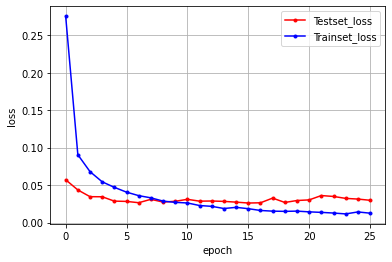

In [11]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


import matplotlib.pyplot as plt
import sys
import os
import numpy 

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

#데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28, 28, 1).astype('float32') / 255


Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션  신경망 설정

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation ='relu'))
model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


MODEL_DIR = './convolution_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./convolution_model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print('\n Accuracy : %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트 셋의 오차

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


